## Задача XIV.10.2

Сама задача для решения осбой сложностью не обладает. Только в процессе решения необходимо следить за выполнением условия переодических граничных условий. Данные места пометил в коде, можете ознакомиться.

Уделить же внимание хочется точному решению данной задачи. В ней рассматривается достаточно типичное однородное гиперболическое уравнение в частных производных вида:

$$ \frac{\partial f}{ \partial t } + a \frac{\partial f}{ \partial x } = 0, $$

где $a = 1$ и начальными условиями: 

$$f(x,0) = \sin \left( \frac{4\pi x}{L} \right)$$

Как это отмечалось на семинарах, точное решение гиперболического уравнения имеет вид $ f(x,t) = \phi( x - at ) $.

В нашем случае имеет вид:

$$f(x,t) = \sin \left( \frac{4\pi (x - t)}{L} \right),$$

что легко проверяется подстановкой данной функции в исходное уравнение.

Так же стоит сказать, что процесс распространяется не только во времени но и в пространстве ( значение $x$ вообще то может вполне превосходить значение $L$ и это вполне естественно ). Возникает вопрос нахождения новых значений $x$. Для этого воспользуемся характеристиками, пусть $x^{*}$ - новый массив кооридинат в момент времени $t^{*}$, тогда из уравнения характеристики верно $ x^{*} = x_0 - t^{*} + t_0  = x_0 - t^{*} $  

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

#Constant
###################################################

sigma = 0.9
h = 0.5
a = 1.
tau = sigma * h

x = np.arange( 0, 41, 1 ) * h

#####################################################

In [28]:
@jit
def ReversStream(sigma, y_plus, y, y_minus):
    return y - sigma * (y - y_minus)

In [29]:
@jit
def Laks(sigma, y_plus, y, y_minus):

    global a

    return y - sigma * (y_plus - y_minus) / 2. + sigma ** 2 * ( y_plus - 2. * y + y_minus ) / 2.

In [30]:
@jit
def CalIter( x, TStop, Shm ):

    global sigma, tau

    t = 0.0

    N = x.size

    y = np.sin(4. * np.pi * x / ( x[-1] - x[ 0 ] ) )

    y_old = np.copy( y )

    while t < TStop:

        y[ 0 ] = Shm( sigma, y_old[ 1 ], y_old[ 0 ], y_old[ -1 ] ) # учитываем граничные условия

        for i in np.arange( 1, N - 1, 1 ):

            y[ i ] = Shm( sigma, y_old[ i + 1 ], y_old[ i ], y_old[ i - 1 ] )

        y[ -1 ] = Shm( sigma, y[ 0 ], y_old[ -1 ], y_old[ -2 ] ) # учитываем граничные условия

        y_old = np.copy( y )

        t += tau

    x = x - t

    return y, x

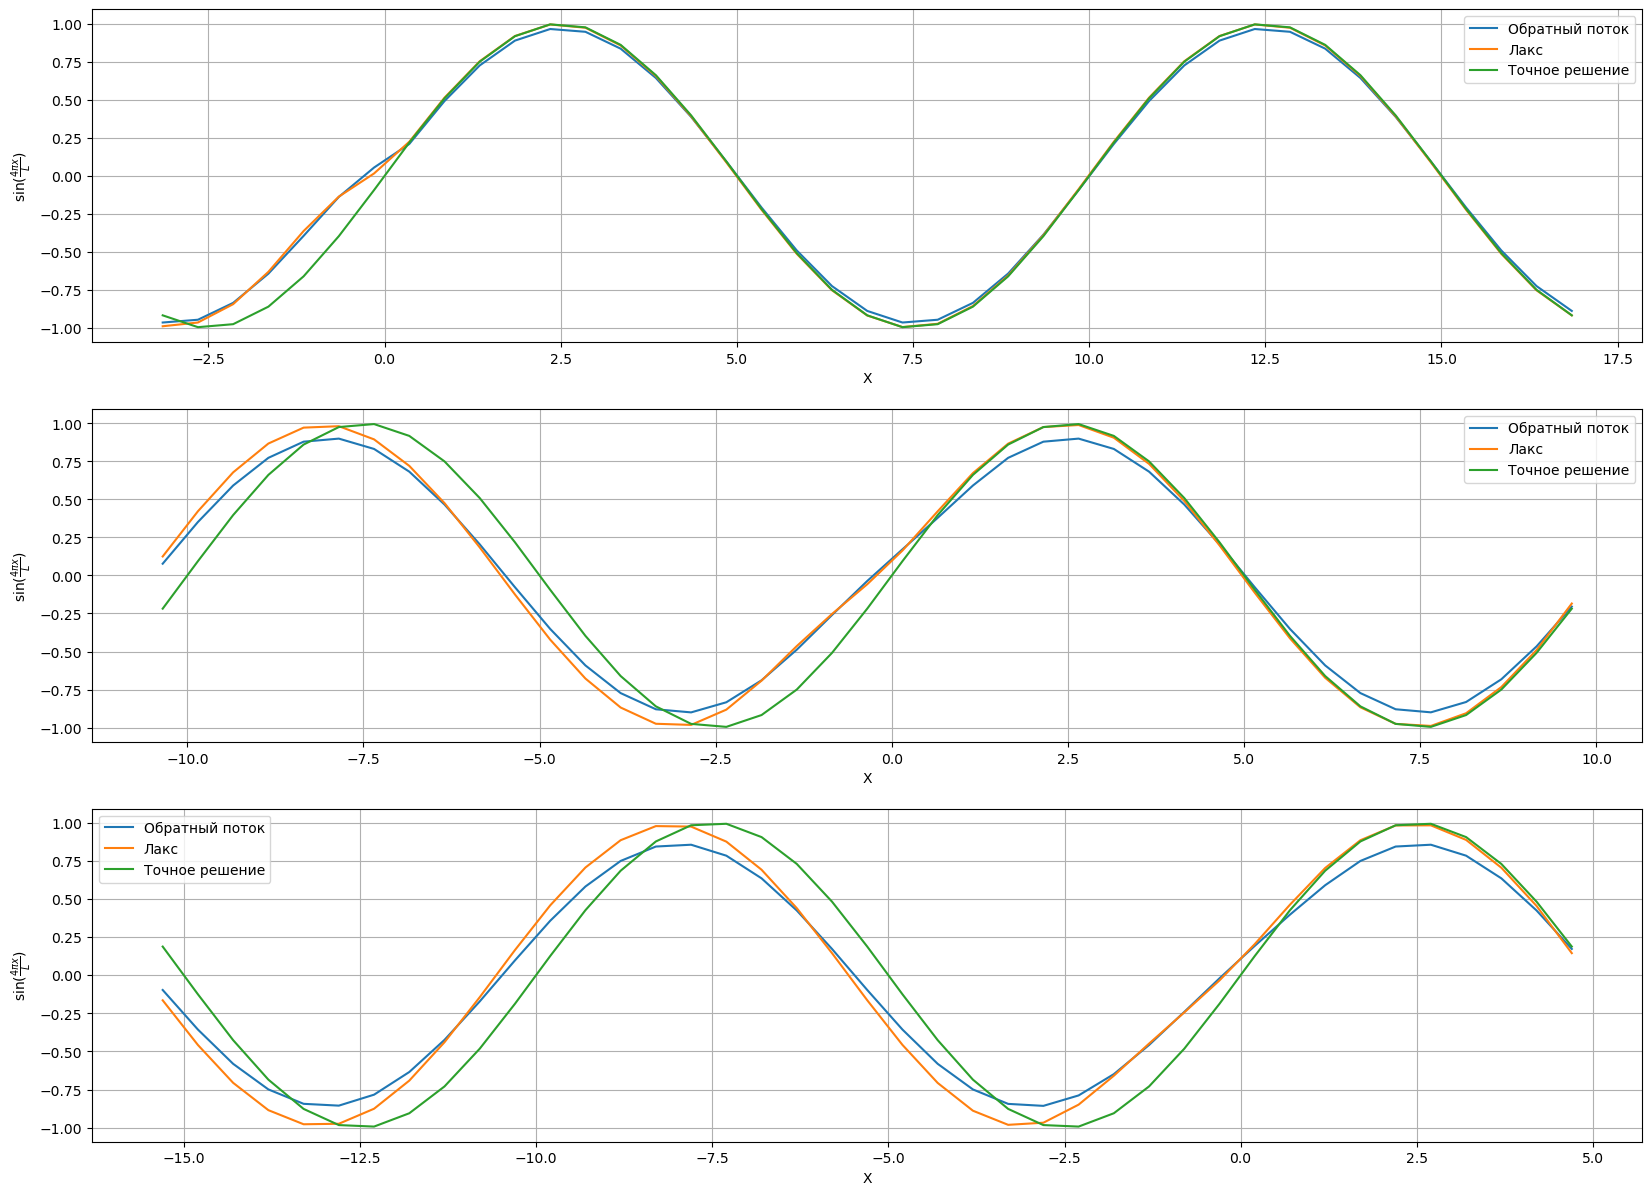

In [31]:
TimeStop = 3

y1, x1 = CalIter( x, TimeStop, ReversStream )
y2, x2 = CalIter( x, TimeStop, Laks )

plt.figure( figsize = ( 20, 15 ), dpi = 100 )
plt.subplot( 311 )
plt.xlabel( 'X' )
plt.ylabel( r'$ \sin( \frac{4\pi x}{ L } ) $' )
plt.plot( x1, y1, x1, y2, x1, np.sin( 4. * np.pi * ( x1 ) / ( x[ -1 ] - x[ 0 ] ) ) )
plt.legend( ['Обратный поток', 'Лакс', 'Точное решение'] )
plt.grid()

TimeStop = 10

y1, x1 = CalIter( x, TimeStop, ReversStream )
y2, x2 = CalIter( x, TimeStop, Laks )

plt.subplot( 312 )
plt.xlabel( 'X' )
plt.ylabel( r'$ \sin( \frac{4\pi x}{ L } ) $' )
plt.plot( x1, y1, x1, y2, x1, np.sin( 4. * np.pi * ( x1 ) / ( x[ -1 ] - x[ 0 ] ) ) )
plt.legend( ['Обратный поток', 'Лакс', 'Точное решение'] )
plt.grid()

TimeStop = 15

y1, x1 = CalIter( x, TimeStop, ReversStream )
y2, x2 = CalIter( x, TimeStop, Laks )

plt.subplot( 313 )
plt.xlabel( 'X' )
plt.ylabel( r'$ \sin( \frac{4\pi x}{ L } ) $' )
plt.plot( x1, y1, x1, y2, x1, np.sin( 4. * np.pi * ( x1 ) / ( x[ -1 ] - x[ 0 ] ) ) )
plt.legend( ['Обратный поток', 'Лакс', 'Точное решение'] )

plt.grid()
plt.show()